# Punto 1 laboratorio 3
Este es el punto 1 del laboratorio 3. Por:
- Santiago Triana 201923265
- Gabriel Beltran 201921903

Importación de librerias usadas en la solución

In [1]:
from pyomo.opt import SolverFactory
from pyomo.environ import *

import matplotlib.pyplot as plt
plt.style.use('ggplot')


## Creación del modelo

In [2]:
Model = ConcreteModel()

## Conjuntos

Despues de crear el modelo creamos el conjunto I, que es el conjunto de los nodos posibles que son modelados en el problema planteado

In [3]:
Model.I = RangeSet(1,7)

## Parametros y variables

Se plantean 3 parametros **(x,y,c)** y una variable binaria **d**.

In [4]:
# valor de la coordenada del nodo i en el eje X
Model.x=[20, 22, 9, 3, 21, 29, 14 ]

# valor de la coordenada del nodo i en el eje Y
Model.y=[6, 1, 2, 25, 10, 2, 12]

Model.c = Param(Model.I, Model.I, mutable=True)

Model.d = Var(Model.I, Model.I, domain=NonNegativeReals)

for i in Model.I:
    for j in Model.I:
        temp = ((Model.x[i-1]-Model.x[j-1])**2+(Model.y[i-1]-Model.y[j-1])**2)**(0.5)
        # tabla que modela los costos desde un nodo a otro
        if temp>20 or j==i:
            Model.c[i,j] = 999
        else:
            Model.c[i,j] = round(temp, 3)
        # Indica si el camino desde i hasta j ha sido escogido.
        Model.d[i,j] = 0

print(Model.c.display())

c : Size=49, Index=c_index, Domain=Any, Default=None, Mutable=True
    Key    : Value
    (1, 1) :    999
    (1, 2) :  5.385
    (1, 3) : 11.705
    (1, 4) :    999
    (1, 5) :  4.123
    (1, 6) :  9.849
    (1, 7) :  8.485
    (2, 1) :  5.385
    (2, 2) :    999
    (2, 3) : 13.038
    (2, 4) :    999
    (2, 5) :  9.055
    (2, 6) :  7.071
    (2, 7) : 13.601
    (3, 1) : 11.705
    (3, 2) : 13.038
    (3, 3) :    999
    (3, 4) :    999
    (3, 5) : 14.422
    (3, 6) :   20.0
    (3, 7) :  11.18
    (4, 1) :    999
    (4, 2) :    999
    (4, 3) :    999
    (4, 4) :    999
    (4, 5) :    999
    (4, 6) :    999
    (4, 7) : 17.029
    (5, 1) :  4.123
    (5, 2) :  9.055
    (5, 3) : 14.422
    (5, 4) :    999
    (5, 5) :    999
    (5, 6) : 11.314
    (5, 7) :   7.28
    (6, 1) :  9.849
    (6, 2) :  7.071
    (6, 3) :   20.0
    (6, 4) :    999
    (6, 5) : 11.314
    (6, 6) :    999
    (6, 7) : 18.028
    (7, 1) :  8.485
    (7, 2) : 13.601
    (7, 3) :  11.18
    (7, 4) : 1

## Función Objetivo

In [5]:
Model.obj = Objective(expr=sum( Model.c[i,j]*Model.d[i,j] for i in Model.I for j in Model.I) , sense=minimize)

## Restricciones

Se plantean 3 restricciones;

- *nodoOrigen:* verifica que el nodo origen si sea el origen
- *nodoDestino:* verifica que el nodo destino si sea el destino
- *nodoIntermedio:* verifica que todo lo que entre a este nodo tiene que salir por lo que no seran nodos destino ni origen

In [6]:
def nodoOrigen_rule(Model, i):
    if i == 4:
        return sum(Model.d[i,j] for j in Model.I)==1
    else:
        return Constraint.Skip
    
Model.nodoOrigen = Constraint(Model.I, rule=nodoOrigen_rule)

def nodoDestino_rule(Model, j):
    if j==6:
        return sum(Model.d[i,j] for i in Model.I)==1
    else:
        return Constraint.Skip

Model.nodoDestino = Constraint(Model.I, rule=nodoDestino_rule)

def nodoIntermedio_rule (Model, i):
    if i!=4 and i!=6:
        return sum(Model.d[i,j] for j in Model.I) - sum(Model.d[j,i] for j in Model.I)==0
    else:
        return Constraint.Skip
    
Model.nodoIntermedio = Constraint(Model.I, rule=nodoIntermedio_rule)

## Solución

In [7]:
SolverFactory('glpk').solve(Model)
Model.display()

Model unknown

  Variables:
    d : Size=49, Index=d_index
        Key    : Lower : Value : Upper : Fixed : Stale : Domain
        (1, 1) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (1, 2) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (1, 3) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (1, 4) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (1, 5) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (1, 6) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (1, 7) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (2, 1) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (2, 2) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (2, 3) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (2, 4) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (2, 5) :     0 :   0.0 :  None : False : False : NonNeg

Se llega entonces a que la mejor solución es realizar el camino **4 -> 7 -> 6**. Este tiene un costo de ***35.057***. Es la forma menos costosa de ir de 4 a 6. 

# Problema 3

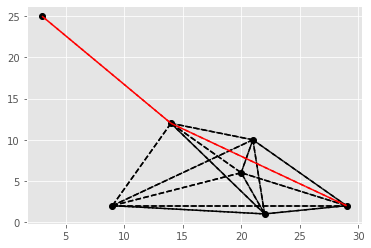

In [47]:
plt.plot(Model.x, Model.y, 'ko')

costos = Model.c.extract_values()
elegidos = Model.d.extract_values()
listos = []

for i in costos:
    if costos[i]<999:
        color = 'k--'
        if elegidos[i]==1 or elegidos[(i[1],i[0])]==1:
            color = 'r--'
        plt.plot([Model.x[i[0]-1],Model.x[i[1]-1]], [Model.y[i[0]-1],Model.y[i[1]-1]], color)
            
            
        
        
    
    
